In [1]:
import pandas as pd

/Users/ilenapeng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv("neiss2017.tsv", sep='\t', na_values=[0, 'NA', 'UNKNOWN'], encoding='latin-1')

# na_values = [0] means that any time they see 0, Unknown or NA, they'll replace with an NaN

# if you just do read_csv, you'll get an error. so you have to do:
# \t -> for tab
# \n -> new line
# \r\n means Windows newline

# But! df = pd.read_csv("neiss2017.tsv", sep='\t')
# this throws a unicode error for utf-8
# iso 8859-1 is the same as latin-1

/Users/ilenapeng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.columns

Index(['CPSC_Case_Number', 'Treatment_Date', 'Age', 'Sex', 'Race',
       'Other_Race', 'Body_Part', 'Diagnosis', 'Other_Diagnosis',
       'Disposition', 'Location', 'Fire_Involvement', 'Product_1', 'Product_2',
       'Narrative_1', 'Narrative_2', 'Stratum', 'PSU', 'Weight'],
      dtype='object')

In [4]:
# Drop rows with NaN in treatment date column
df = df.dropna(subset=['Treatment_Date'])

In [5]:
# Number of people of each gender who punched a wall
df.Sex.value_counts()

# documentation 1: male, 2: female, 0: not recorded

1.0    208695
2.0    178203
Name: Sex, dtype: int64

In [6]:
# VER. 2: STUFF WE DID BEFORE WE PUT THE REPLACING IN THE DATA IMPORT
# Replace numeric values and replace Not recorded with NA here

import numpy as np

df.Sex = df.Sex.replace({
    1: 'Male',
    2: 'Female',
    0: np.nan
})

# df.Sex.value_counts()
# to include the NAs do: df.Sex.value_counts(dropna=False) -> is better than dropping the row
# with Sex = 0 or 8 or something

In [7]:
# VER. 1: STUFF WE DID EARLIER BEFORE REPLACING 0 WITH NA UP TOP (VER 2)
# df.Sex = df.Sex.replace({
#     1: 'Male',
#     2: 'Female',
#     0: 'Not recorded'
# })

# df[df.Sex == 8]

# Find all rows with missing treatment data
# NaN is not a string so you can't == it. So you do this:
# .isnull and .isna -- do the same thing
# df[df.Treatment_Date.isna()]

# if you do it without the = sign, it won't work. inplace=True will work, but he dislikes it

In [8]:
# Percentages of male and female and not recorded
df.Sex.value_counts(normalize=True)

Male      0.539406
Female    0.460594
Name: Sex, dtype: float64

In [9]:
# df.info returns data type and if a value is non-null
# object -> usually a string
# df.dtypes for just data type

<AxesSubplot:>

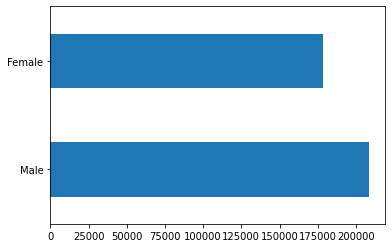

In [10]:
df.Sex.value_counts().plot(kind='barh')

In [11]:
df.head(5)

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21.0,Male,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,1207.0,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71.0,Male,1.0,NaN,31.0,53.0,NaN,1.0,5.0,NaN,1807.0,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,170100735,01/01/2017,16.0,Male,1.0,NaN,33.0,51.0,NaN,1.0,1.0,NaN,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...,S,46.0,77.6641
3,170100737,01/01/2017,55.0,Female,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,620.0,NaN,55YOF WAS STANDING ON A STEP STOOL AND LOST FO...,HEAD INJURY,S,46.0,77.6641
4,170100740,01/01/2017,86.0,Female,1.0,NaN,79.0,58.0,NaN,1.0,1.0,NaN,1646.0,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641


In [12]:
# Convert age to dstring
df.Age = df.Age.astype(float)

In [13]:
df.Age.mean()

44.370752624804204

<AxesSubplot:>

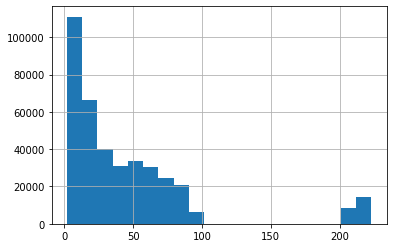

In [14]:
df.Age.hist(bins=20)

In [15]:
# Let's look at everyone older than 200 -> we found out that 212: 12 months and 208: 8 months
df[df.Age >= 200]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
72,170104133,01/01/2017,212.0,Male,NaN,NaN,75.0,62.0,NaN,1.0,1.0,NaN,671.0,NaN,12 MONTH OLD MALE CLIMBED UP ONTO ROCKING CHAR...,TH CLOSED HEAD INJ,V,38.0,16.1828
116,170106101,01/01/2017,208.0,Female,3.0,UNKNOWN,75.0,53.0,NaN,1.0,1.0,NaN,4076.0,1807.0,8 MOF FELL OFF BED TO FLOOR. DX SCALP CONTUSION,NaN,C,31.0,4.7570
125,170106113,01/01/2017,218.0,Female,1.0,NaN,83.0,57.0,NaN,1.0,1.0,NaN,1545.0,NaN,18 MOF FELL FROM CRIB. DX FOOT FX,NaN,C,31.0,4.7570
126,170106117,01/01/2017,218.0,Male,1.0,NaN,32.0,55.0,NaN,1.0,5.0,NaN,1645.0,NaN,18 MOM - PT EATING SPAGHETTI AT A RESTAURANT A...,VE AND HEARD A POP. DX NURSEMAIDS ELBOW,C,31.0,4.7570
129,170106120,01/01/2017,204.0,Female,3.0,HISPANIC,75.0,53.0,NaN,1.0,1.0,NaN,4076.0,1807.0,4 MOF FELL OFF BED TO FLOOR. DX SCALP CONTUSION,NaN,C,31.0,4.7570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386890,180309750,12/18/2017,212.0,Female,2.0,NaN,75.0,62.0,NaN,4.0,1.0,NaN,661.0,NaN,12MO F FELL OFF BUNK BED;DX CLOSED HEAD INJURY...,NaN,C,20.0,4.7570
386892,180309752,12/19/2017,218.0,Male,1.0,NaN,85.0,68.0,NaN,4.0,1.0,NaN,1913.0,NaN,18MO M WITH REACTION TO *** LOTION; DX ALLERGI...,NaN,C,20.0,4.7570
386903,180309763,12/31/2017,212.0,Female,2.0,NaN,92.0,50.0,NaN,4.0,1.0,NaN,4076.0,NaN,"12MO F PT LYING IN BED, THERE WAS A DRIVE-BY S...",UGH WALL AND HIT PT IN BED; DX AMPUTATED THUMB,C,20.0,4.7570
386904,180309764,12/31/2017,218.0,Male,1.0,NaN,81.0,57.0,NaN,4.0,1.0,NaN,1395.0,NaN,18MO M SLIPPED ON TOY;DX FEMUR FX,NaN,C,20.0,4.7570


In [16]:
# To keep only values under 200
df = df[df.Age < 200].copy()
# copy stops Python from throwing error

# Turns age into a decimal so 212 (12 mos) becomes one
# df.loc[df.Age >= 200, 'Age'] = (df.Age - 200) / 12

In [17]:
# No matter how much text is in column, just print it all out
# Can use a number instead of None to set a number of characters
pd.set_option("display.max_colwidth", None)

In [18]:
df.head(2)

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21.0,Male,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,1207.0,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AND GOT PUNCHED IN THE FACE,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXICATION,S,46.0,77.6641
1,170100734,01/01/2017,71.0,Male,1.0,NaN,31.0,53.0,NaN,1.0,5.0,NaN,1807.0,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641


# # Look at wall punchers

In [19]:
# Look for a certain word within Narrative_1
# To not be case sensitive:
df[df.Narrative_1.str.contains("punch", case=False)]
# other option: df[df.Narrative_1.str.contains('PUNCH')]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21.0,Male,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,1207.0,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AND GOT PUNCHED IN THE FACE,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXICATION,S,46.0,77.6641
32,170102931,01/01/2017,26.0,Male,NaN,NaN,82.0,59.0,NaN,1.0,1.0,NaN,1892.0,NaN,26YOM LAC HAND- PUNCHED GLASS DOOR,NaN,M,14.0,87.0904
94,170104156,01/01/2017,26.0,Male,NaN,NaN,33.0,59.0,NaN,1.0,NaN,NaN,1894.0,NaN,26 YR OLD MALE PUNCHED GLASS WINDOW AND LAC FOREARM,NaN,V,38.0,16.1828
135,170106135,01/01/2017,25.0,Male,2.0,NaN,33.0,59.0,NaN,1.0,NaN,NaN,1892.0,NaN,25YOM PUNCHED A GLASS DOOR AND CUT HIS FOREARM.,DX. LAC. FOREARM.,S,29.0,77.6641
170,170106272,01/02/2017,26.0,Female,2.0,NaN,34.0,57.0,NaN,1.0,1.0,NaN,1884.0,NaN,"26YOF WITH FRACTURED WRIST, PUNCHED A WALL",NaN,V,61.0,16.1828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386027,180212983,12/29/2017,31.0,Male,NaN,NaN,75.0,52.0,NaN,1.0,9.0,NaN,3257.0,NaN,31YM MMA FIGHTER HAD A MATCH 1WA DURING WHICH WAS PUNCHED TO FACE W/O L,"OC YET MENTAL FOGGINESS, BV&F.HEAD NUMBNESS SINCE>>CONCUSSION",V,21.0,16.9919
386149,180215154,12/30/2017,22.0,Male,NaN,NaN,82.0,53.0,NaN,1.0,NaN,NaN,1893.0,NaN,22YM PUNCHED A DOOR C BOTH HANDS IN ANGER YTD,>>HAND CONTS,V,21.0,16.9919
386328,180227997,12/16/2017,16.0,Male,1.0,NaN,82.0,57.0,NaN,1.0,5.0,NaN,1884.0,NaN,16YOM PUNCHED WALL IN ANGER AT INPATIENT PSYCHIATRIC HOSPITAL DX RIGHT,BOXERS FRACTURE /,C,10.0,4.7570
386403,180235384,12/17/2017,23.0,Male,2.0,NaN,92.0,59.0,NaN,1.0,NaN,NaN,1894.0,NaN,23 YOM PUNCHED A WINDOW.,DX: 5 CM LAC R FIFTH FINGER.,V,93.0,16.9919


In [20]:
# To punch walls
# .* means put anything in between punch and wall. this is called a regular expression
df[df.Narrative_1.str.contains('punch.*wall', case=False)]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
170,170106272,01/02/2017,26.0,Female,2.0,NaN,34.0,57.0,NaN,1.0,1.0,NaN,1884.0,NaN,"26YOF WITH FRACTURED WRIST, PUNCHED A WALL",NaN,V,61.0,16.1828
678,170109865,01/01/2017,26.0,Male,1.0,NaN,82.0,71.0,HAND PAIN,1.0,NaN,NaN,1884.0,NaN,LT HAND PAIN. 26YOM PAIN IN HAND FROM PUNCHING WALL.,NaN,V,95.0,16.1828
715,170110026,01/02/2017,24.0,Male,NaN,NaN,82.0,57.0,NaN,1.0,NaN,NaN,1884.0,NaN,24 YOM C/O L HAND PAIN AND SWELLING AFTER PUNCHING A WALL. DX L HAND FX,/,M,76.0,87.0904
842,170111675,01/04/2017,23.0,Female,NaN,NaN,82.0,71.0,PAIN,6.0,NaN,NaN,1884.0,NaN,23YF C/O HAND PAIN P PUNCHING A WALL C CLOSED FIST,>>PAIN,V,21.0,16.1828
1050,170113068,01/02/2017,23.0,Female,NaN,NaN,82.0,59.0,NaN,1.0,NaN,NaN,1884.0,NaN,23YOF PUNCHED A WALL W/ RIGHT HAND DX: OPEN WOUND OF HAND,NaN,V,35.0,16.1828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385343,180155464,12/21/2017,29.0,Male,NaN,NaN,82.0,57.0,NaN,1.0,NaN,NaN,1884.0,NaN,29YM C/O ON GOING HAND PAIN SINCE PUNCHING A WALL SEV. WKS AGO,>>FX,V,21.0,16.9919
385747,180207260,12/25/2017,21.0,Male,NaN,NaN,82.0,57.0,NaN,1.0,NaN,NaN,1884.0,NaN,21YM C/O HAND PAIN/SWELLING P PUNCHING A WALL EARLIER,>>FX,V,21.0,16.9919
385817,180207651,12/27/2017,45.0,Male,NaN,NaN,82.0,57.0,NaN,1.0,NaN,NaN,1884.0,NaN,45YM C/O HAND PAIN/SWELLING P PUNCHING A WALL SEV. XS,>>FX,V,21.0,16.9919
386328,180227997,12/16/2017,16.0,Male,1.0,NaN,82.0,57.0,NaN,1.0,5.0,NaN,1884.0,NaN,16YOM PUNCHED WALL IN ANGER AT INPATIENT PSYCHIATRIC HOSPITAL DX RIGHT,BOXERS FRACTURE /,C,10.0,4.7570


In [21]:
# save this to DF
punchers = df[df.Narrative_1.str.contains('punch.*wall', case=False)]

In [22]:
# number of female vs male wall punchers
punchers.Sex.value_counts()

Male      1487
Female     550
Name: Sex, dtype: int64

<AxesSubplot:>

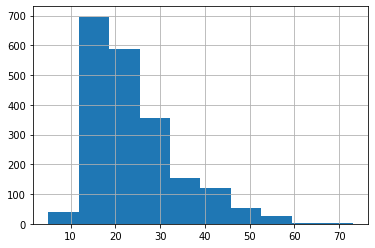

In [23]:
# age histogram for wall punchers
punchers.Age.hist()

<AxesSubplot:>

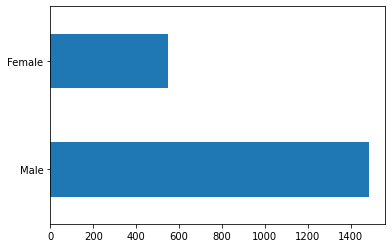

In [24]:
# alternatively
punchers.Sex.value_counts().plot(kind='barh')

In [ ]:
# this will work but will give you the index, which you don't want
# punchers.to_csv('punchers.csv')

punchers.to_csv('punchers.csv', index=False)

# # Clean 'Other Race' column

In [31]:
pd.set_option("display.min_rows", None)
df.Other_Race.value_counts()

HISPANIC           15728
UNKNOWN             2239
MULTI-RACIAL        2004
HISP                 760
SOMALI               361
NS                   300
UNKN                 118
BIRACIAL              37
NEPALI                36
MULTIRACIAL           28
MULTI RACIAL          24
NON HISPANIC          14
ARAB                  13
PUERTO RICAN          13
MEXICAN               13
DECLINE               12
`                     11
DO NOT KNOW           11
UNK                   10
SPANISH                8
HISPAINC               8
DECLINED               7
HISAPNIC               6
FULANI                 5
MANDARIN               5
HISPANCI               5
NOT STATED             4
N/S                    4
HISPAINIC              4
LAO                    4
                   ...  
=                      1
"                      1
TWO OR MORE RAC        1
OTHER RACE UK          1
ORIENTAL               1
HIS                    1
UNKOWN                 1
AMISH                  1
MEXICIAN               1


In [32]:
df[df.Other_Race.notna()].head(2)

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
117,170106102,01/01/2017,4.0,Male,3.0,HISPANIC,75.0,59.0,NaN,1.0,NaN,NaN,379.0,NaN,4 YOM FELL AND HIT RADIATOR. DX SCALP LACERATION,NaN,C,31.0,4.7570
156,170106239,01/02/2017,10.0,Female,3.0,HISPANIC,36.0,59.0,NaN,1.0,1.0,NaN,1842.0,NaN,10YOF WITH LAC TO LOWER LEG FROM ON STEPS,NaN,V,61.0,16.1828


In [34]:
# Only things that contain HISP
# need na=False or will throw error
df[df.Other_Race.str.contains('HISP', na=False)]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
117,170106102,01/01/2017,4.0,Male,3.0,HISPANIC,75.0,59.0,NaN,1.0,NaN,NaN,379.0,NaN,4 YOM FELL AND HIT RADIATOR. DX SCALP LACERATION,NaN,C,31.0,4.7570
156,170106239,01/02/2017,10.0,Female,3.0,HISPANIC,36.0,59.0,NaN,1.0,1.0,NaN,1842.0,NaN,10YOF WITH LAC TO LOWER LEG FROM ON STEPS,NaN,V,61.0,16.1828
173,170106715,01/01/2017,6.0,Male,3.0,HISPANIC,75.0,52.0,NaN,1.0,1.0,NaN,1807.0,NaN,6YOM- PT WAS RUNNING IN THE HOME FELL STUCK HEAD ONTO THE FLOOR,VOMITED X 2. ACTING SLEEPY. DX- CONCUSSION.,C,90.0,4.7570
174,170106719,01/01/2017,18.0,Male,3.0,HISPANIC,79.0,64.0,NaN,1.0,1.0,NaN,604.0,NaN,18YOM-PT WAS HOME MOVING A DRESSER SOMETHING POPPED NOW PAIN TO,ABDOMINAL AREA. DX- STRAIN OF LEFT SIDED ABDOMIN.,C,90.0,4.7570
177,170106722,01/01/2017,10.0,Male,3.0,HISPANIC,NaN,41.0,NaN,1.0,1.0,NaN,1682.0,NaN,10YOM-PT HAD A BOBBY PIN IN MOUTH & ACCIDENTALLY SWALLOWED.,DX- SWALLOWED BOBBY PIN.,C,90.0,4.7570
178,170106724,01/01/2017,13.0,Male,3.0,HISPANIC,35.0,64.0,NaN,1.0,1.0,NaN,1233.0,NaN,13YOM-PT WAS JUMPING ON A TRAMPLOLINE W/ FRIENDS FELL & TWISTED LEFT,KNEE. FELT A POP. DX- RIGHT KNEE SPRAIN.,C,90.0,4.7570
180,170106726,01/01/2017,2.0,Female,3.0,HISPANIC,76.0,59.0,NaN,1.0,1.0,NaN,4057.0,NaN,2YOF-PT FELL HITTING FOREHEAD ONTO THE TABLE PT WITH SOME BLEEDING TO,FOREHEAD. DX- 0.5CM FOREHEAD LACERATION.,C,90.0,4.7570
188,170106886,01/02/2017,4.0,Male,3.0,HISPANIC,38.0,71.0,PENILE PAIN,1.0,NaN,NaN,649.0,NaN,"4YOM DROPPED A TOILET SEAT ON HIS PENIS 2 MONTHS AGO, NOW C/O PENILE",DISCHARGE AND PAIN FOR 3 DAYS; PENILE PAIN AND DISCHARGE/SMEGMA,C,8.0,4.7570
270,170107147,01/02/2017,27.0,Male,3.0,HISPANIC,83.0,57.0,NaN,1.0,1.0,NaN,1842.0,NaN,LEFT FDOT FX. 27 YOM WAS RUNNING DOWNSTAIRS WHEN HE MISSED THE LAST,STEP AND TWISTED HIS FOOT.,V,95.0,16.1828
316,170107695,01/01/2017,10.0,Male,3.0,HISPANIC,93.0,53.0,NaN,1.0,1.0,NaN,5019.0,NaN,10 YOM C/O LEFT MIDDLE TOE PAIN AFTER DROPPING A GAME BOARD ON IT,DX: TOE CONTUSION,V,61.0,16.1828


In [40]:
# Regular expressions
# S? means "you COULD have this S... but it's okay if you don't"
# [IY] means "you can have an I ****or**** a Y right here"
# Add a ^ to specify things that specify the start of the string 
# but then we lose `HISPANIC and ?HISPANIC
df[df.Other_Race.str.contains("H[IY]SS?P", na=False)].Other_Race.value_counts()
# regex is default true, so it knows what we're saying

HISPANIC           15728
HISP                 760
NON HISPANIC          14
HISPAINC               8
HISPANCI               5
HISPAINIC              4
NONHISPANIC            2
HISPANICE              2
HISPANIC.              2
HISPAIN                1
HISPANI                1
`HISPANIC              1
HISPANIC10             1
HISPANICX              1
HISPOANIC              1
HISSPANIC              1
HISPANC                1
?HISPANIC              1
HISPANINC              1
NON-HISPANIC           1
HYSPANIC/LATINO        1
HISPANIC1              1
Name: Other_Race, dtype: int64

In [45]:
# .str.replace does PARTIAL replacements of a string
# so if I want to get rid of ?
# I am going to say
# replace ? with ......
# number one trick of programming:
# if you hate something, replace it with an empty string
df.Other_Race = df.Other_Race.str.replace("?", "", regex=False)
df.Other_Race = df.Other_Race.str.replace('"', "", regex=False)
df.Other_Race = df.Other_Race.str.replace("`", "", regex=False)

# Replace every character that is not A-Z or a space
df.Other_Race = df.Other_Race.str.replace("[^A-Z ]", "", regex=True)

In [46]:
# everytime it says HISP, replace it with Hispanic
# regex is default FALSE in replace, so we have to specify it as True
# ^HISP.* means it starts with HISP and has anything afterwards
# ^HIS.*P.* means starts with HIS and has something and then P and then something
df.Other_Race.replace("^HIS.*P.*", "HISPANIC", regex=True).value_counts()

HISPANIC           16527
UNKNOWN             2239
MULTIRACIAL         2032
SOMALI               361
NS                   304
UNKN                 118
BIRACIAL              37
NEPALI                36
MULTI RACIAL          24
                      14
NON HISPANIC          14
ARAB                  13
PUERTO RICAN          13
MEXICAN               13
DECLINE               12
DO NOT KNOW           11
UNK                   10
SPANISH                8
DECLINED               7
FULANI                 5
MANDARIN               5
LAO                    4
NOT STATED             4
JAPANESE               4
RUSSIAN                3
BLACKWHITE             3
NONHISPANIC            3
HAKHA CHIN             3
HSPANIC                3
VIETNAMESE             3
                   ...  
NG                     1
TIGRINYA               1
WHITEBLACK             1
ORIENTAL               1
MIDDLE EASTERN         1
OTHER RACE UK          1
OTHER                  1
OROMO                  1
HSP                    1


In [48]:
# .isin allows you to search for multiple strings
df[df.Other_Race.isin(['HISPANIC', 'HISP', 'HISSPANIC'])]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
117,170106102,01/01/2017,4.0,Male,3.0,HISPANIC,75.0,59.0,NaN,1.0,NaN,NaN,379.0,NaN,4 YOM FELL AND HIT RADIATOR. DX SCALP LACERATION,NaN,C,31.0,4.7570
156,170106239,01/02/2017,10.0,Female,3.0,HISPANIC,36.0,59.0,NaN,1.0,1.0,NaN,1842.0,NaN,10YOF WITH LAC TO LOWER LEG FROM ON STEPS,NaN,V,61.0,16.1828
173,170106715,01/01/2017,6.0,Male,3.0,HISPANIC,75.0,52.0,NaN,1.0,1.0,NaN,1807.0,NaN,6YOM- PT WAS RUNNING IN THE HOME FELL STUCK HEAD ONTO THE FLOOR,VOMITED X 2. ACTING SLEEPY. DX- CONCUSSION.,C,90.0,4.7570
174,170106719,01/01/2017,18.0,Male,3.0,HISPANIC,79.0,64.0,NaN,1.0,1.0,NaN,604.0,NaN,18YOM-PT WAS HOME MOVING A DRESSER SOMETHING POPPED NOW PAIN TO,ABDOMINAL AREA. DX- STRAIN OF LEFT SIDED ABDOMIN.,C,90.0,4.7570
177,170106722,01/01/2017,10.0,Male,3.0,HISPANIC,NaN,41.0,NaN,1.0,1.0,NaN,1682.0,NaN,10YOM-PT HAD A BOBBY PIN IN MOUTH & ACCIDENTALLY SWALLOWED.,DX- SWALLOWED BOBBY PIN.,C,90.0,4.7570
178,170106724,01/01/2017,13.0,Male,3.0,HISPANIC,35.0,64.0,NaN,1.0,1.0,NaN,1233.0,NaN,13YOM-PT WAS JUMPING ON A TRAMPLOLINE W/ FRIENDS FELL & TWISTED LEFT,KNEE. FELT A POP. DX- RIGHT KNEE SPRAIN.,C,90.0,4.7570
180,170106726,01/01/2017,2.0,Female,3.0,HISPANIC,76.0,59.0,NaN,1.0,1.0,NaN,4057.0,NaN,2YOF-PT FELL HITTING FOREHEAD ONTO THE TABLE PT WITH SOME BLEEDING TO,FOREHEAD. DX- 0.5CM FOREHEAD LACERATION.,C,90.0,4.7570
188,170106886,01/02/2017,4.0,Male,3.0,HISPANIC,38.0,71.0,PENILE PAIN,1.0,NaN,NaN,649.0,NaN,"4YOM DROPPED A TOILET SEAT ON HIS PENIS 2 MONTHS AGO, NOW C/O PENILE",DISCHARGE AND PAIN FOR 3 DAYS; PENILE PAIN AND DISCHARGE/SMEGMA,C,8.0,4.7570
270,170107147,01/02/2017,27.0,Male,3.0,HISPANIC,83.0,57.0,NaN,1.0,1.0,NaN,1842.0,NaN,LEFT FDOT FX. 27 YOM WAS RUNNING DOWNSTAIRS WHEN HE MISSED THE LAST,STEP AND TWISTED HIS FOOT.,V,95.0,16.1828
316,170107695,01/01/2017,10.0,Male,3.0,HISPANIC,93.0,53.0,NaN,1.0,1.0,NaN,5019.0,NaN,10 YOM C/O LEFT MIDDLE TOE PAIN AFTER DROPPING A GAME BOARD ON IT,DX: TOE CONTUSION,V,61.0,16.1828


## Join with product data

In [49]:
# merge data
# neiss_products.txt is a csv but without the file extension -> that doesn't matter!
products = pd.read_csv('neiss_products.txt')
products.head()

,Format name,Value,Label
0,PROD,101,101 - WASHING MACHINES WITHOUT WRINGERS OR OTHER DRYERS
1,PROD,102,102 - WRINGER WASHING MACHINES
2,PROD,103,103 - WASHING MACHINES WITH UNHEATED SPIN DRYERS
3,PROD,106,106 - ELECTRIC CLOTHES DRYERS WITHOUT WASHERS
4,PROD,107,107 - GAS CLOTHES DRYERS WITHOUT WASHERS


In [52]:
# df.join is on indexes so we don't use that
# left_on is the column name from df, right_on is column from products
merged = df.merge(products, left_on='Product_1', right_on='Value')

In [54]:
merged[merged.Label.str.contains('CHRISTMAS')].Label.value_counts()

1729 - CHRISTMAS DECORATIONS (NONELECTRIC)                   129
1736 - ELECTRIC CHRISTMAS DECORATIONS (EXCL. TREE LIGHTS)     79
1701 - ARTIFICIAL CHRISTMAS TREES                             40
1711 - CHRISTMAS TREE LIGHTS                                  17
1712 - CHRISTMAS TREE STANDS OR SUPPORTS                       1
Name: Label, dtype: int64